In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Load dataset
data = pd.read_csv('diabetes_dirty.csv')


In [3]:
# Preview the dataset
print(data.head())
print(data.info())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6  PROGRESSION
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87          151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69           75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85          141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89          206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80          135
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    flo

**What the Dataset contains is:**

sex = 1 - female

sex = 2 - male



In [5]:
print(data.columns)

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6',
       'PROGRESSION'],
      dtype='object')


In [7]:
# Define X (independent variables) and y (dependent variable)
X = data.drop('PROGRESSION', axis=1)
y = data['PROGRESSION']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [10]:
# Apply StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

We're applying both MinMax and Standard scaling for comparison

In [11]:
# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train_standard, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 153.7365439093484
Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


In [13]:
# Predict using test data
y_pred = model.predict(X_test_standard)

In [14]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score on test set: {r2:.4f}")

R² Score on test set: 0.4526


The R² score indicates how well the model explains the variability in the progression values. A score closer to 1 means a better fit.

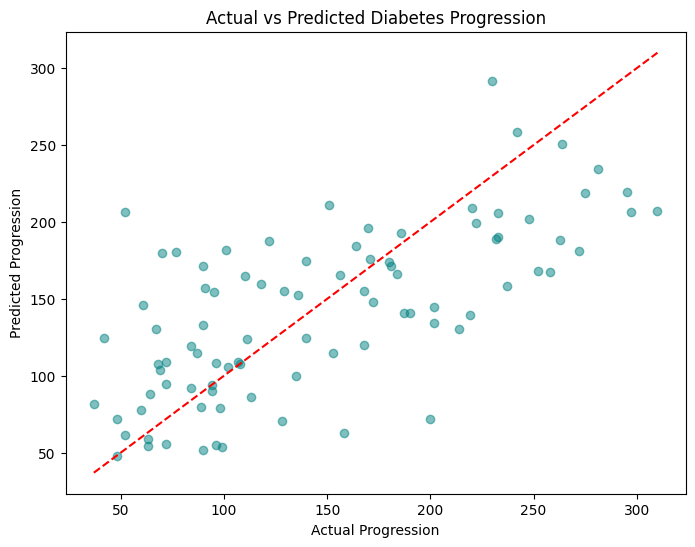

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted Diabetes Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

The scatter plot of **actual vs. predicted progression** values shows how closely the model's predictions align with the true outcomes. Preferably, the data points would lie along the red dashed line (which represents perfect predictions).

In our case:
1. There is some visible alignment with the diagonal line, but also noticeable scatter.
2. This indicates that the model captures some general trends in the data but has limited precision.
3. The spread around the line suggests that other factors or a more complex model may be needed to better capture the relationship between features and diabetes progression.

**Overall, the linear regression model provides a baseline level of prediction, but improvements could be made with more advanced models.**